### Задачи к Лекции 4

__Исходные данные__ 

Дан файл **"mlbootcamp5_train.csv"**. В нем содержатся данные об опросе 70000 пациентов с целью определения наличия заболеваний сердечно-сосудистой системы (ССЗ). Данные в файле промаркированы и если у человека имееются ССЗ, то значение **cardio** будет равно 1, в противном случае - 0. Описание и значения полей представлены во второй лекции.

__Загрузка файла__

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(font_scale=1.5)

from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../data/mlbootcamp5_train.csv", 
                 sep=";", 
                 index_col="id")
# Делаем one-hot кодирование
chol = pd.get_dummies(df["cholesterol"], prefix="chol")
gluc = pd.get_dummies(df["gluc"], prefix="gluc")
df = pd.concat([df, chol, gluc], axis=1)

# Делаем пол бинарным признаком
df["gender_bin"] = df["gender"].map({1: 0, 2: 1})
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3,gender_bin
id,,,,,,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,1,0,0,1,0,0,1
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,0,0,1,1,0,0,0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0,0,1,1,0,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1,0,0,1,0,0,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,1,0,0,1,0,0,0


## Классы в Python

Нередко, возникает необходимость создания объектов с каким-нибудь внутренним поведением и состоянием. Примерами таких объектов являются классификаторы sklearn, массивы numpy и много другое. Такой объект можно объявить с помощью ключевого слова **class**

```python
class SomeObject:
    def __init__(self, depth):
        self.a = depth
        self.target = None
        
    def fit(self, data, target):
        self.target = data
        # magic
        return 
    
    def predict(self, data):
        return self.target    
```

После этого в коде можно будет создать экземпляр данного класса
```python
a = SomeObject(depth=5)
a.fit(data, target)
a.predict(data)
```

## Задачи

**1. В sklearn на данный момент отсутствует функционал для построения деревьев решений из категориальных данных, поэтому его нужно сделать самостоятельно и проверить его работу. Что нужно сделать:**

* __создать классификатор используя только pandas, numpy и scipy. Необходимо его сделать самому, используя исключительно только numpy, pandas и scipy (запрещено использовать sklearn и прочие библиотеки). Напоминаю, что для категориальных данных операция < или > не имеют смысла (использовать только != и ==). Гиперпараметром данного классификатора должна быть максимальная глубина дерева.__
* __Проверить работу данного классификатора на наборе ("gender", "cholesterol", "gluc").__
* __С помощью кросс-валидации найти оптимальную глубину этого дерева. Для вашего классификатора GridSearchCV не подойдет, придется это сделать также самостоятельно.__
* __Нарисовать полученное дерево (я должен понять, как и откуда вы его нарисовали).__

Алгоритм работы классификатора:
 1. Перебираем все возможные признаки и смотрим либо неопределенность Джини, либо прирост информации. Это даст критерий разбиения в виде "признак == значение"
 2. Если выборка полученная при разбиении состоит из объектов одного класса (соответсвует нулевой энтропии), то данный лист просто возвращает значение этого класса.
 3. В противном случае, образуется новый узел и для него начинаем с пункта 1.
 4. Если достигли максимальной глубины, то вместа узла создаем лист, который возвращает самое вероятное значение.
 
__Замечание:__ в этой задаче не нужно использовать onehot-кодирование.

In [2]:
# я пытався
class MyDecisionTreeClassifier():
    pass

In [3]:
X = df[['gender', 'cholesterol', 'gluc', 'cardio']]

In [4]:
def test_split(data, column, index):

    left = data[data[column] == index]
    right = data[data[column] != index]

    return [left, right]

In [5]:
def entropy(groups):
    
        
    def s0_(groups):
        
        if len(groups) == 2:
            data = pd.concat((groups[0], groups[1]), axis=0)
        else:
            data = groups

        Y = data[data.columns[-1:]]
        N = data.shape[0]
        N_i = np.unique(Y, return_counts=True) 

        s = -np.sum((N_i[1][i] / N) * np.log2(N_i[1][i] / N) for i in range(len(N_i)))
    
        return s
    
    # вычисление s1
    def s1_(groups):
        N = groups[0].shape[0]
        Y = groups[0][groups[0].columns[-1]]
        N_i = np.unique(Y, return_counts=True)

        s1 = -np.sum((N_i[1][i] / N) * np.log2(N_i[1][i] / N) for i in range(len(N_i)))
        
        return s1
    
    # вычисление s2
    def s2_(groups):
        N = groups[1].shape[0]
        Y = groups[1][groups[1].columns[-1]]
        N_i = np.unique(Y, return_counts=True)

        s2 = -np.sum((N_i[1][i] / N) * np.log2(N_i[1][i] / N) for i in range(len(N_i)))
        
        return s2
    
    
    N = np.sum(group.shape[0] for group in groups)
    N_1 = groups[0].shape[0]; N_2 = groups[1].shape[0]

    IG = s0_(groups) - (N_1 / N) * s1_(groups) - (N_2 / N) * s2_(groups)

    return IG

In [6]:
def to_pandas(data):
    return pd.DataFrame(data=data, columns=['gender', 'cholesterol', 'gluc', 'cardio'])

In [7]:
def get_split(X):
    
    if type(X) == type(np.ones(2)):
        X = to_pandas(X)
    
    list_s, list_ind, list_val = list(), list(), list()
    for index in X.columns[:-1]:
        
        unique_X = X[index].unique()
        
        for value in unique_X:

            groups = test_split(X, index, value)
            IG = entropy(groups)
            list_s.append(IG)
            list_ind.append(index)
            list_val.append(value)
#             print(f'{index} = {value}, IG: {IG}')
            
        
        get = dict(zip(list_s, list(zip(list_ind, list_val))))
        max_val = get[max(get.keys())]
        b_group = test_split(X, max_val[0], max_val[1])
        arg = get[max(get.keys())]    
#     return b_group, max(get.keys()), *get[max(get.keys())]
        
    return {'groups': [b_group[0].values, b_group[1].values],
            'max_val': max(get.keys()), 
            'index': arg[0], 
            'value': arg[1]}

In [8]:
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

In [9]:
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])

    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_split(left)
        split(node['left'], max_depth, min_size, depth+1)
    
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_split(right)
        split(node['right'], max_depth, min_size, depth+1)

In [10]:
def build_tree(train, max_depth, min_size):
    root = get_split(train)
    split(root, max_depth, min_size, 1)
    return root

In [11]:
tree = build_tree(X, 1, 1)
tree

{'max_val': 0.030991785028907093,
 'index': 'cholesterol',
 'value': 1,
 'left': 0,
 'right': 1}

In [12]:
# получилось только построить пенёк, а дальше он не хочет, при разбиении по признаку, получалось так, что все объекты
# принадлежали одному признаку и второе множество получалось пустым.

**Комментарии:** Ваши комментарии здесь.

**2. В этой задаче и далее можно использовать sklearn. Выше, данные были приведены либо к бинарным признакам, либо к количественным. Это позволяет воспользоваться классификатором DecisionTreeClassifier. Нужно с помощью кросс-валидации найти оптимальный набор признаков. Показать и объяснить, как данный набор был получен.**

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 6

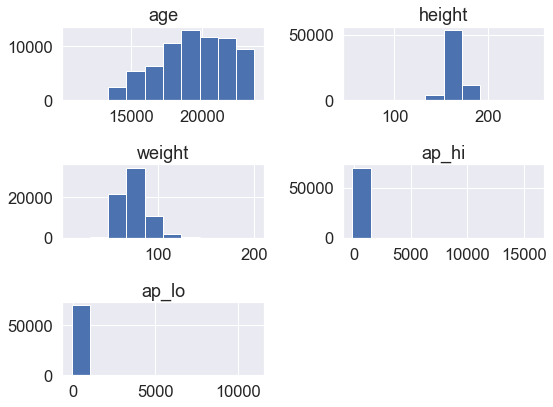

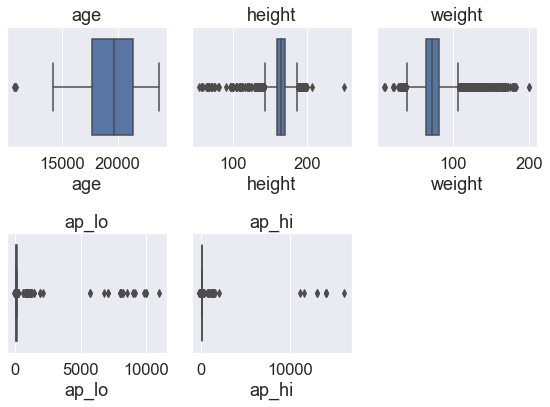

In [14]:
df[["age", "height", "weight", "ap_hi", "ap_lo"]].hist()
plt.tight_layout()
plt.show()

for i, col in enumerate(["age", "height", "weight", "ap_lo", "ap_hi"]):
    plt.subplot(231 + i)
    plt.title(col)
    sns.boxplot(df[col])
plt.tight_layout()
plt.show()

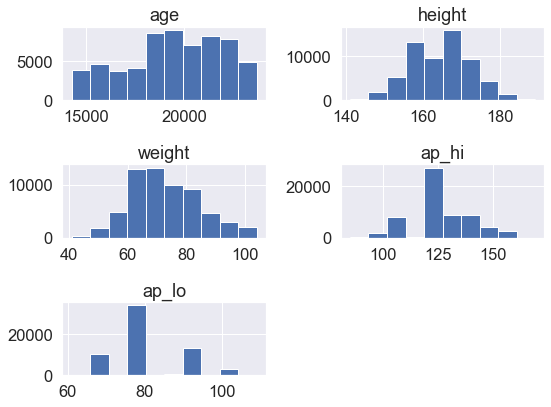

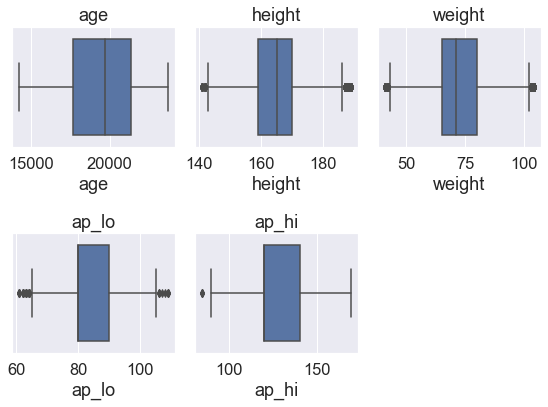

In [15]:
data = df[(df["age"] > 12500)&
          (df["weight"] > 40)&(df["weight"] < 105)&
          (df["height"] > 140)&(df["height"] < 190)&
          (df["ap_lo"] > 60)&(df["ap_lo"] < 110)&
          (df["ap_hi"] > 80)&(df["ap_hi"] < 170)
         ]

data[["age", "height", "weight", "ap_hi", "ap_lo"]].hist()
plt.tight_layout()
plt.show()

for i, col in enumerate(["age", "height", "weight", "ap_lo", "ap_hi"]):
    plt.subplot(231 + i)
    plt.title(col)
    sns.boxplot(data[col])
plt.tight_layout()
plt.show()

Почистили данные

In [16]:
n_features = {'1': [df.drop(['cardio'], axis=1), df['cardio']],
              '2': [df.drop(['cardio', 'gluc', 'cholesterol', 'gender'], axis=1), df['cardio']],
              '3': [data.drop(['cardio'], axis=1), data['cardio']],
              '4': [data.drop(['gluc', 'cholesterol', 'gender', 'cardio'], axis=1),
                  data['cardio']]}

In [17]:
for key in n_features:
    X_train, X_test, y_train, y_test = train_test_split(n_features[key][0], 
                                                         n_features[key][1], 
                                                         test_size=0.3, 
                                                         random_state=17)
    model = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
    pred = model.predict(X_test)
    ACC = accuracy_score(y_test, pred)
    print(f'ACC for {key}: {ACC}')
    

ACC for 1: 0.727
ACC for 2: 0.727
ACC for 3: 0.7191521574564723
ACC for 4: 0.7191521574564723


Наибольшее значение **accuracy** было на первом наборе признаков, где не убирались выбросы и категориальные признаки

In [18]:
# здесь были убраны выбросы, то есть количество объектов во всем датасете уменьшилось, поэтому уменишилась ACC
n_features['3'][0].shape

(61646, 18)

Для поиска подходящих гиперпареметров для модели будет использоваться первый набор данных из словаря **n_features**.

**Комментарии:** Ваши комментарии здесь.

**3. Для набора признаков полученных в задаче 3, с помощью кросс-валидации найти оптимальный набор гиперпараметров.**

In [19]:
# напиишем функцию для поиска подходящих гиперпараметрои и посроения графика зависимости метрики от значения гиперпараметров
def search_and_draw(X, y, model, param_name, grid, param_scale='ordinary', draw=True):
    parameters = {param_name: grid}
    
    CV_model = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1,
                           verbose=10)
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']
    
    if draw:
        plt.figure(figsize=(15, 8))
        plt.title('choose ' + param_name)
        
        if (param_scale == 'log'):
            plt.xscale('log')
        
        plt.plot(grid, means, label='mean values of score', c='red', lw=3)
        
        plt.fill_between(grid, means - 2 * error, means + 2 * error, 
                         color='green', label='filled area between errors', alpha=0.5)
        legend_box = plt.legend(framealpha=1).get_frame()
        legend_box.set_facecolor("white")
        legend_box.set_edgecolor("black")
        plt.xlabel('parameter')
        plt.ylabel('accuracy')
        plt.show()
        
    return means, error, CV_model.best_params_, CV_model.best_score_

In [20]:
X = df.drop(['cardio'], axis=1)
y = df['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

model = DecisionTreeClassifier()
param_name = 'max_depth'
grid = np.arange(1, 30)
param_scale = 'ordinary'

Fitting 5 folds for each of 29 candidates, totalling 145 fits


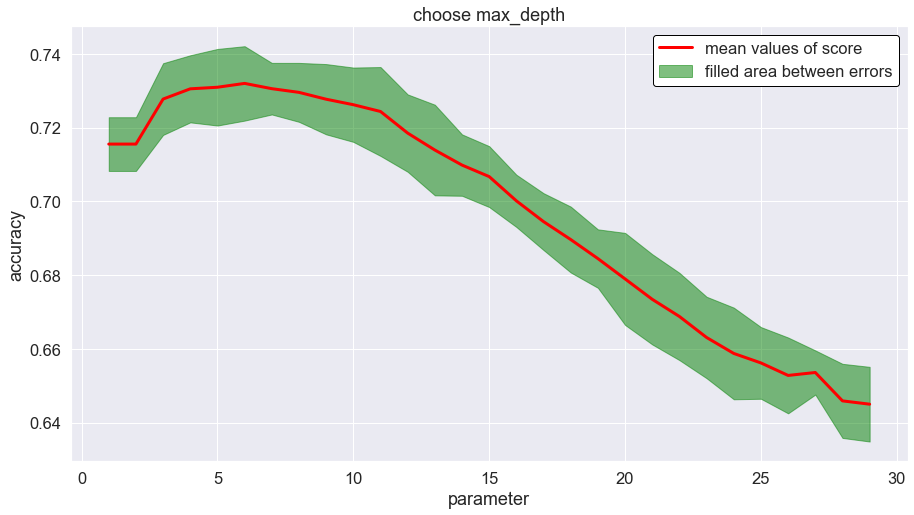

(array([0.7155102 , 0.7155102 , 0.72771429, 0.7304898 , 0.73091837,
        0.73195918, 0.73053061, 0.72953061, 0.72767347, 0.72618367,
        0.72434694, 0.7184898 , 0.71389796, 0.70981633, 0.70669388,
        0.70012245, 0.6944898 , 0.68963265, 0.68446939, 0.67895918,
        0.67342857, 0.66877551, 0.66308163, 0.6587551 , 0.65618367,
        0.65279592, 0.65359184, 0.64589796, 0.645     ]),
 array([0.00364101, 0.00364101, 0.00486066, 0.00454805, 0.00519106,
        0.00504433, 0.00349534, 0.00399375, 0.00476232, 0.00503739,
        0.00602321, 0.00524311, 0.0061433 , 0.00415966, 0.0041276 ,
        0.00354151, 0.00385439, 0.00446543, 0.00396223, 0.00623816,
        0.00611517, 0.00591696, 0.0055213 , 0.00621274, 0.00485809,
        0.0051401 , 0.00299479, 0.00502281, 0.00506147]),
 {'max_depth': 6},
 0.7319591836734693)

In [21]:
search_and_draw(X_train, y_train, model, param_name, grid, param_scale)

Была проведена 5-ти кратная CV, лучшим значением параметра **max_depth** является 6, при которой ACC = 0.7319795918367347

In [22]:
# Сделаем прогноз для отложенной выборки
model = DecisionTreeClassifier(max_depth=6).fit(X_train, y_train)
pred = model.predict(X_test)
ACC = accuracy_score(y_test, pred)
print(f'ACC: {ACC}')

ACC: 0.7258095238095238


**Комментарии:** Значение **accuracy** на тесте в пределах нормы, можно сделать вывод, что модель не переобучилась.

**4. Сравнить с помощью кросс-валидации классификатор "наивный байес" и "решающее дерево" на количественных признаках. Показать, какой из них лучше.**

In [23]:
from sklearn.naive_bayes import GaussianNB

# воспользуемся данными, у которых были убраны выбросы
X = data[["age", "height", "weight", "ap_hi", "ap_lo"]]
y = data['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=17)

In [24]:
models = DecisionTreeClassifier()
param_names = 'max_depth'
grids = np.arange(1, 30)
param_scales = 'ordinary'

Fitting 5 folds for each of 29 candidates, totalling 145 fits


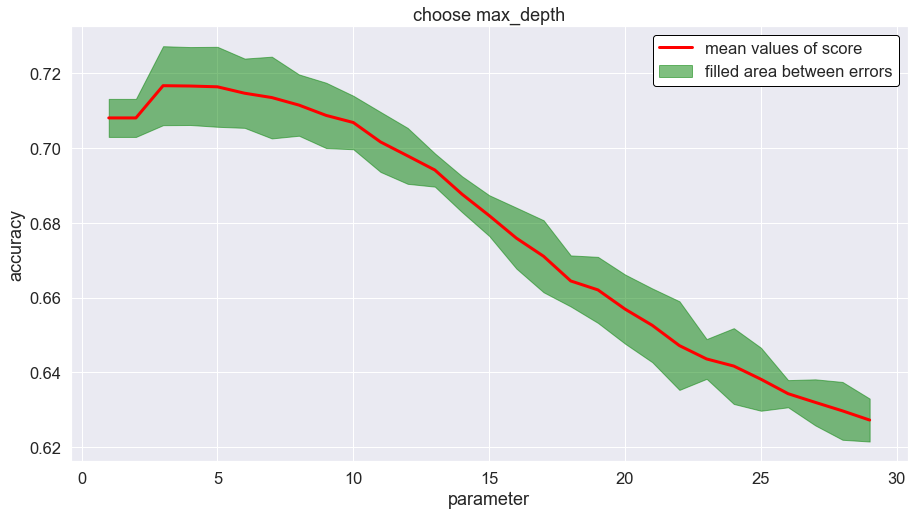

(array([0.70805525, 0.70805525, 0.71667599, 0.71658329, 0.71637471,
        0.71465988, 0.71350123, 0.71148504, 0.70872741, 0.70682714,
        0.70163622, 0.69790522, 0.69412779, 0.68766223, 0.6819383 ,
        0.67591298, 0.67106964, 0.66446507, 0.66207812, 0.65693355,
        0.65260006, 0.64717739, 0.6436086 , 0.64170836, 0.63818592,
        0.63431588, 0.63199854, 0.62972761, 0.62727111]),
 array([0.00254326, 0.00254326, 0.0052799 , 0.00520823, 0.00534468,
        0.00463112, 0.00546507, 0.00409671, 0.00436544, 0.00357478,
        0.00401081, 0.00373727, 0.0022234 , 0.00239791, 0.00272442,
        0.00407427, 0.00481478, 0.00341385, 0.00441444, 0.00462288,
        0.00492975, 0.00592432, 0.0026587 , 0.0050662 , 0.00421243,
        0.00181487, 0.0030808 , 0.00386568, 0.00287133]),
 {'max_depth': 3},
 0.716675987940208)

In [25]:
search_and_draw(X_train, y_train, model, param_name, grid, param_scale)

In [26]:
model = DecisionTreeClassifier(max_depth=3).fit(X_train, y_train)
pred = model.predict(X_test)
ACC = accuracy_score(y_test, pred)
print(f'ACC: {ACC}')

ACC: 0.7116362063371905


In [27]:
# для байеса можно не проводить кросс-валидацию иммено по признакам, потому что это было сделано во втором ДЗ, где 
# выяснилось, что лучшие результаты показывает выборка, в которой убраны выбросы
model = GaussianNB().fit(X_train, y_train)
pred = model.predict(X_test)
ACC = accuracy_score(y_test, pred)
print(f'ACC: {ACC}')

ACC: 0.7027143938574673


**Комментарии:** Лучшие результаты на тесте показал алгоритм решающих деревьев с небольшим отрывом.